In [ ]:
#importing packages

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#loading dataset

data=pd.read_excel('ML_Lab4.xlsx')

data #printing data

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [ ]:
# Defining a function to calculate entropy for a given attribute
def calculate_entropy(attribute_values):
    entropy = 0
    total_instances = len(attribute_values)

    for category, count in attribute_values.value_counts().items():
        probability = count / total_instances
        entropy -= probability * math.log2(probability)

    return entropy

# Defining a function to calculate Information Gain
def calculate_information_gain(attribute_name, class_label):
    # Calculating the entropy of the entire dataset
    total_entropy = calculate_entropy(data[class_label])

    # Calculating the weighted average entropy after splitting on the attribute
    weighted_entropy = 0
    total_instances = len(data)

    for category, subset in data.groupby(attribute_name):
        probability = len(subset) / total_instances
        subset_entropy = calculate_entropy(subset[class_label])
        weighted_entropy += probability * subset_entropy

    # Calculating Information Gain
    information_gain = total_entropy - weighted_entropy

    return information_gain

best_attribute = None
lowest_entropy = float('inf')

for column in data.columns[:-1]:
    if data[column].dtype == 'object':
        entropy = calculate_entropy(data[column])
        print("Entropy of " + column + ": " + str(entropy))

        # Checking if this attribute has lower entropy than the current lowest entropy
        if entropy < lowest_entropy:
            lowest_entropy = entropy
            best_attribute = column

print("\nBest attribute for the first split: " + best_attribute)

best_attribute = None
highest_information_gain = -1

for column in data.columns[:-1]:
    if data[column].dtype == 'object':
        information_gain = calculate_information_gain(column, 'buys_computer')
        print("Information Gain of " + column + ": " + str(information_gain))

        # Checking if this attribute has higher Information Gain than the current highest
        if information_gain > highest_information_gain:
            highest_information_gain = information_gain
            best_attribute = column

print("\nBest attribute for the root node: " + best_attribute)


Entropy of age: 1.5774062828523454
Entropy of income: 1.5566567074628228
Entropy of student: 1.0
Entropy of credit_rating: 0.9852281360342515

Best attribute for the first split: credit_rating
Information Gain of age: 0.24674981977443933
Information Gain of income: 0.02922256565895487
Information Gain of student: 0.15183550136234159
Information Gain of credit_rating: 0.04812703040826949

Best attribute for the root node: age


In [ ]:
data = pd.DataFrame({'age_range': ['31...40', '41...50', '21...30', '31...40'],
                     'buys_computer': [1, 0, 0, 1]})

# Separate features (X) and target (y)
X = data.drop(columns=['buys_computer'])
y = data['buys_computer']

# Initializing the OrdinalEncoder to convert datatype
encoder = OrdinalEncoder()

# Transforming the 'age_range' column
X['age_range'] = encoder.fit_transform(X[['age_range']])

# Spliting the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Decision Tree model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy:", training_accuracy)

tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)


Training Set Accuracy: 1.0
Tree Depth: 1


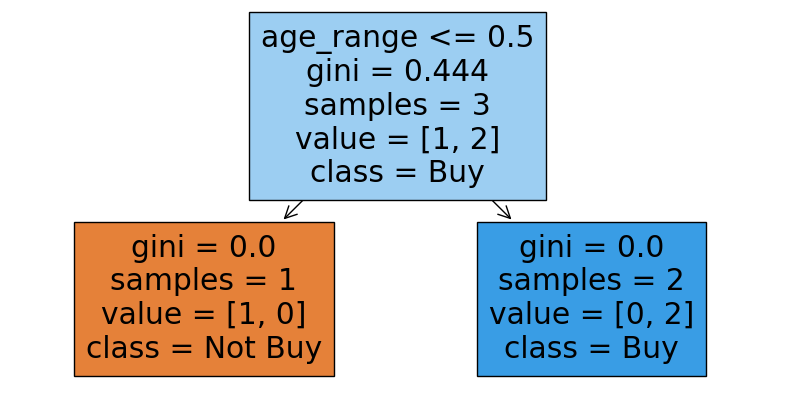

In [ ]:
# Setting the figure size for the plot
plt.figure(figsize=(10, 5))

# Decision Tree Plot
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Buy', 'Buy'])

plt.show()

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_excel("/content/dataset_final.xlsx")
df


,serial_no,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,1,33.571474,37.613824,30.087053,37.102539,0.771983,0.746361,0.809737,0.747152,0.341245,...,5075.587782,0.036918,0.030155,0.037329,0.029864,0.192141,0.173651,0.193207,0.172812,0
1,2,18.461546,25.806718,25.655944,26.883562,0.797231,0.627642,0.614348,0.586758,0.081968,...,1678.201018,0.000190,0.000158,0.000198,0.000165,0.013800,0.012556,0.014080,0.012841,0
2,3,17.975612,24.888646,23.639344,23.941351,0.800654,0.667611,0.716540,0.705741,0.094696,...,1324.597589,0.000161,0.000127,0.000132,0.000130,0.012707,0.011277,0.011473,0.011389,0
3,4,11.001795,11.536333,9.729197,11.648599,0.869841,0.866218,0.894534,0.856053,0.638126,...,1055.424191,0.343982,0.346157,0.359534,0.345615,0.586500,0.588351,0.599612,0.587890,0
4,5,15.650286,17.982019,18.060362,17.958789,0.854187,0.811520,0.816796,0.805573,0.101942,...,758.388765,0.000241,0.000221,0.000243,0.000219,0.015534,0.014856,0.015576,0.014787,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7548,7549,16.925538,20.332626,18.604267,19.585180,0.864210,0.829935,0.847647,0.824120,0.137506,...,1280.003693,0.000369,0.000351,0.000394,0.000340,0.019196,0.018735,0.019842,0.018445,1
7549,7550,17.848387,23.827080,24.299426,22.578884,0.775781,0.609099,0.578468,0.635227,0.106233,...,1304.169553,0.000796,0.000733,0.000885,0.000799,0.028216,0.027078,0.029746,0.028260,1
7550,7551,20.951268,24.088787,19.732787,23.811821,0.818473,0.777452,0.844136,0.784300,0.182817,...,1768.716003,0.000897,0.000643,0.001096,0.000663,0.029942,0.025353,0.033113,0.025749,1
7551,7552,14.827614,20.486181,19.381950,18.129424,0.849159,0.771357,0.797813,0.820712,0.211721,...,911.023256,0.003049,0.002118,0.002126,0.002239,0.055214,0.046026,0.046103,0.047319,1


Training Set Accuracy: 1.0
Test Set Accuracy: 1.0


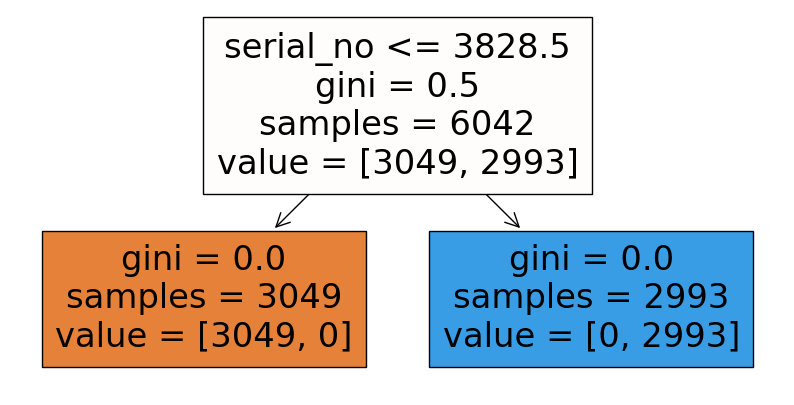

In [ ]:
# Separate features (X) and target (y)
from sklearn.model_selection import train_test_split
X = df.drop("label",axis=1)

y = df["label"]

# Splitting the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y  = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Decision Tree model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Calculating the training set and test set accuracy
training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy:", training_accuracy)

test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy:", test_accuracy)

# Decision Tree Plot
plt.figure(figsize=(10, 5))
plot_tree(model, filled=True, feature_names=X.columns)

plt.show()


Training Set Accuracy (max_depth=5): 100.00%
Test Set Accuracy (max_depth=5): 100.00%


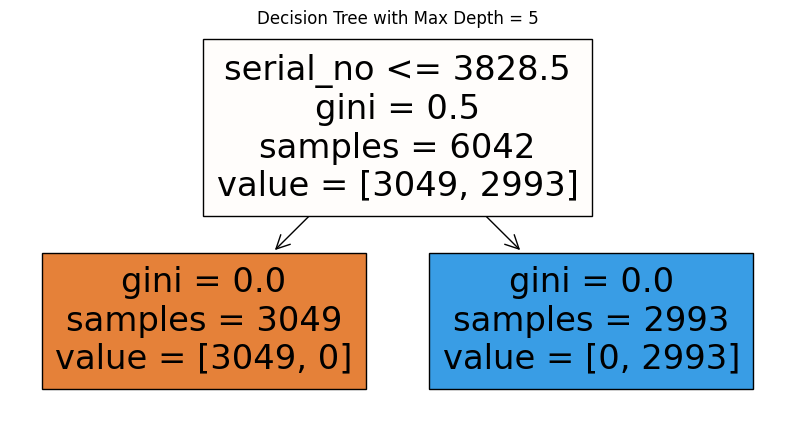

In [ ]:
# Separate features (X) and target (y)
X = df.drop("label",axis=1)
y = df["label"]

# Splitting the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Decision Tree model with max_depth constraint
max_depth = 5
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(Tr_X, Tr_y)

# Calculating the training set and test set accuracy
training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy (max_depth={}): {:.2f}%".format(max_depth, training_accuracy * 100))

test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy (max_depth={}): {:.2f}%".format(max_depth, test_accuracy * 100))

# Decision Tree with max_depth constraint Plot
plt.figure(figsize=(10, 5))
plot_tree(model, filled=True, feature_names=X.columns)
plt.title("Decision Tree with Max Depth = {}".format(max_depth))
plt.show()

Training Set Accuracy (Entropy Criterion): 100.00%
Test Set Accuracy (Entropy Criterion): 100.00%


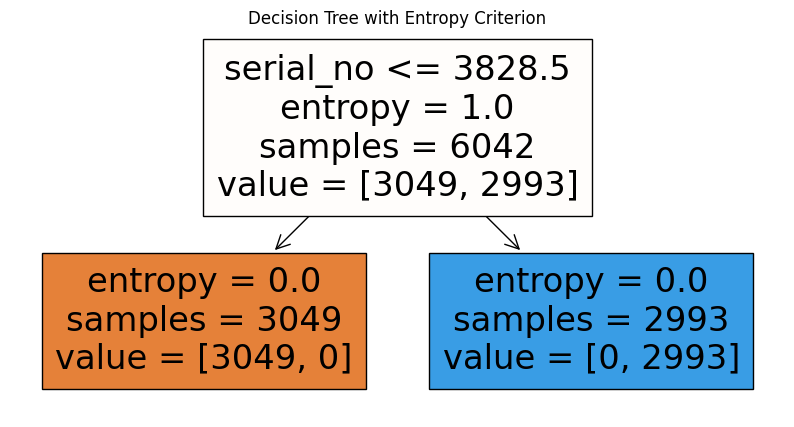

In [ ]:
# Fitting the Decision Tree model with "entropy" criterion
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(Tr_X, Tr_y)

# Calculating the training set and test set accuracy for entropy criterion
training_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
print("Training Set Accuracy (Entropy Criterion): {:.2f}%".format(training_accuracy_entropy * 100))

test_accuracy_entropy = model_entropy.score(Te_X, Te_y)
print("Test Set Accuracy (Entropy Criterion): {:.2f}%".format(test_accuracy_entropy * 100))

# Decision Tree with entropy Plot
plt.figure(figsize=(10, 5))
plot_tree(model_entropy, filled=True, feature_names=X.columns)
plt.title("Decision Tree with Entropy Criterion")
plt.show()

In [ ]:
# Fitting a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(Tr_X, Tr_y)

# Making predictions on the test set using the Decision Tree classifier
decision_tree_predictions = decision_tree_classifier.predict(Te_X)

# Calculating accuracy and other performance metrics for the Decision Tree
decision_tree_accuracy = accuracy_score(Te_y, decision_tree_predictions)
decision_tree_report = classification_report(Te_y, decision_tree_predictions, output_dict=True)

print("Decision Tree Classifier Performance:")
print("Accuracy:", decision_tree_accuracy)
print("Classification Report:")
print("Precision:", decision_tree_report['1']['precision'])
print("Recall:", decision_tree_report['1']['recall'])
print("F1 Score:", decision_tree_report['1']['f1-score'])

# Fitting a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(Tr_X, Tr_y)

# Making predictions on the test set using the Random Forest classifier
random_forest_predictions = random_forest_classifier.predict(Te_X)

# Calculating accuracy and other performance metrics for the Random Forest
random_forest_accuracy = accuracy_score(Te_y, random_forest_predictions)
random_forest_report = classification_report(Te_y, random_forest_predictions, output_dict=True)

print("\nRandom Forest Classifier Performance:")
print("Accuracy:", random_forest_accuracy)
print("Classification Report:")
print("Precision:", random_forest_report['1']['precision'])
print("Recall:", random_forest_report['1']['recall'])
print("F1 Score:", random_forest_report['1']['f1-score'])


Decision Tree Classifier Performance:
Accuracy: 1.0
Classification Report:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Random Forest Classifier Performance:
Accuracy: 1.0
Classification Report:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
